#### Projet en Data Science : Prédiction des retards de vols 

### 1. Importation de Bibliothèques 

In [12]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score, ConfusionMatrixDisplay, confusion_matrix,roc_curve, auc
import joblib

In [14]:
pip install XGBOOST

Note: you may need to restart the kernel to use updated packages.


### 2. Chargement de dataset

In [16]:
# Charger le fichier CSV
df = pd.read_csv('Airlines.csv')

In [20]:
df.head(20) # Afficher les 20 premières lignes

id Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay
0    1      CO     269         SFO       IAH          3    15     205      1
1    2      US    1558         PHX       CLT          3    15     222      1
2    3      AA    2400         LAX       DFW          3    20     165      1
3    4      AA    2466         SFO       DFW          3    20     195      1
4    5      AS     108         ANC       SEA          3    30     202      0
5    6      CO    1094         LAX       IAH          3    30     181      1
6    7      DL    1768         LAX       MSP          3    30     220      0
7    8      DL    2722         PHX       DTW          3    30     228      0
8    9      DL    2606         SFO       MSP          3    35     216      1
9   10      AA    2538         LAS       ORD          3    40     200      1
10  11      CO     223         ANC       SEA          3    49     201      1
11  12      DL    1646         PHX       ATL          3    50     212      1
12  13      DL    2055         SLC       ATL          3    50     210      0
13  14      AA    2408         LAX       DFW          3    55     170      0
14  15      AS     132         ANC       PDX          3    55     215      0
15  16      US     498         DEN       CLT          3    55     179      0
16  17      B6      98         DEN       JFK          3    59     213      0
17  18      CO    1496         LAS       IAH          3    60     162      0
18  19      DL    1450         LAS       MSP          3    60     181      0
19  20      CO     507         ONT       IAH          3    75     167      0

In [22]:
df.info() #Structure de DataFrame 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [24]:
df.dtypes # Types de données des colonnes

id              int64
Airline        object
Flight          int64
AirportFrom    object
AirportTo      object
DayOfWeek       int64
Time            int64
Length          int64
Delay           int64
dtype: object

In [26]:
df.describe() # Statistiques descriptives

id         Flight      DayOfWeek           Time  \
count  539383.00000  539383.000000  539383.000000  539383.000000   
mean   269692.00000    2427.928630       3.929668     802.728963   
std    155706.60446    2067.429837       1.914664     278.045911   
min         1.00000       1.000000       1.000000      10.000000   
25%    134846.50000     712.000000       2.000000     565.000000   
50%    269692.00000    1809.000000       4.000000     795.000000   
75%    404537.50000    3745.000000       5.000000    1035.000000   
max    539383.00000    7814.000000       7.000000    1439.000000   

              Length          Delay  
count  539383.000000  539383.000000  
mean      132.202007       0.445442  
std        70.117016       0.497015  
min         0.000000       0.000000  
25%        81.000000       0.000000  
50%       115.000000       0.000000  
75%       162.000000       1.000000  
max       655.000000       1.000000

### 3. Prétraitement des données

In [29]:
# Vérifier s'il y a des valeurs manquantes dans le DataFrame
print(df.isnull().sum())

# Pour afficher uniquement les colonnes avec des valeurs manquantes
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Colonnes avec des valeurs manquantes :")
print(missing_values)

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64
Colonnes avec des valeurs manquantes :
Series([], dtype: int64)


In [31]:
# Vérifier les doublons
duplicates = df.duplicated()
print("Nombre de doublons :", duplicates.sum())

Nombre de doublons : 0


#### 4. Encodage des variables catégoriques 

In [33]:
# Initialiser les encodeurs
label_encoder_airline = LabelEncoder()
label_encoder_airport_from = LabelEncoder()
label_encoder_airport_to = LabelEncoder()

# Appliquer LabelEncoder sur les colonnes catégorielles
df['Airline'] = label_encoder_airline.fit_transform(df['Airline'])
df['AirportFrom'] = label_encoder_airport_from.fit_transform(df['AirportFrom'])
df['AirportTo'] = label_encoder_airport_to.fit_transform(df['AirportTo'])

In [35]:
# Sauvegarder les encodeurs dans des fichiers
joblib.dump(label_encoder_airline, 'label_encoder_airline.pkl')
joblib.dump(label_encoder_airport_from, 'label_encoder_airport_from.pkl')
joblib.dump(label_encoder_airport_to, 'label_encoder_airport_to.pkl')

['label_encoder_airport_to.pkl']

In [37]:
# Vérifier le DataFrame encodé
df.head()

id  Airline  Flight  AirportFrom  AirportTo  DayOfWeek  Time  Length  Delay
0   1        4     269          253        135          3    15     205      1
1   2       14    1558          217         60          3    15     222      1
2   3        1    2400          154         80          3    20     165      1
3   4        1    2466          253         80          3    20     195      1
4   5        2     108           14        252          3    30     202      0

#### 5. Préparation des variables explicatives (X) et cible (y)

Séparation des variables indépendantes (X) et de la variable cible (y)

In [41]:
# Diviser les données en features et target
X = df.drop(['Delay'], axis=1)  # Variables explicatives
y = df['Delay']  # Variable cible

#### 6. Normalisation des données 

In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### 7. Division des données en ensembles d'entrainement et de test

In [47]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 8. Entraînement des modèles 

##### 1- Entraînement du modèle MLPClassifier 

In [51]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=300, random_state=42)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)

##### Évaluation des performances du modèle MLPClassifier

In [53]:
# Prédiction sur l'ensemble de test
y_pred_mlp = mlp.predict(X_test)

# Calcul de l'accuracy pour MLP
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Accuracy (MLPClassifier): {accuracy_mlp:.2f}")

# Rapport de classification pour MLP
print("\nClassification Report (MLPClassifier):")
print(classification_report(y_test, y_pred_mlp, zero_division=0))

Accuracy (MLPClassifier): 0.56

Classification Report (MLPClassifier):
              precision    recall  f1-score   support

           0       0.56      1.00      0.71     59879
           1       0.00      0.00      0.00     47998

    accuracy                           0.56    107877
   macro avg       0.28      0.50      0.36    107877
weighted avg       0.31      0.56      0.40    107877



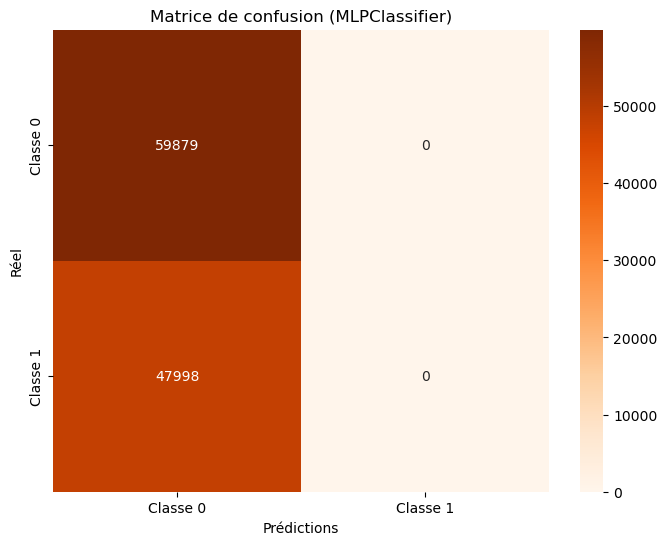

In [55]:
# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred_mlp)

# Affichage de la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matrice de confusion (MLPClassifier)')
plt.xlabel('Prédictions')
plt.ylabel('Réel')
plt.show()

##### 2- Entraînement du modèle XGBClassifier 

In [58]:
xgb_model = XGBClassifier(n_estimators=100,max_depth=6,learning_rate=0.1,subsample=0.8,colsample_bytree=0.8,random_state=42)

In [60]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

##### Evaluations du Modèle XGBClassifier

In [62]:
# Prédiction sur l'ensemble de test
y_pred_xgb = xgb_model.predict(X_test)

# Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"\nAccuracy (XGBClassifier): {accuracy_xgb:.2f}")

# Rapport de classification
print("\nClassification Report (XGBClassifier):")
print(classification_report(y_test, y_pred_xgb, zero_division=0))


Accuracy (XGBClassifier): 0.69

Classification Report (XGBClassifier):
              precision    recall  f1-score   support

           0       0.69      0.80      0.74     59879
           1       0.69      0.54      0.60     47998

    accuracy                           0.69    107877
   macro avg       0.69      0.67      0.67    107877
weighted avg       0.69      0.69      0.68    107877



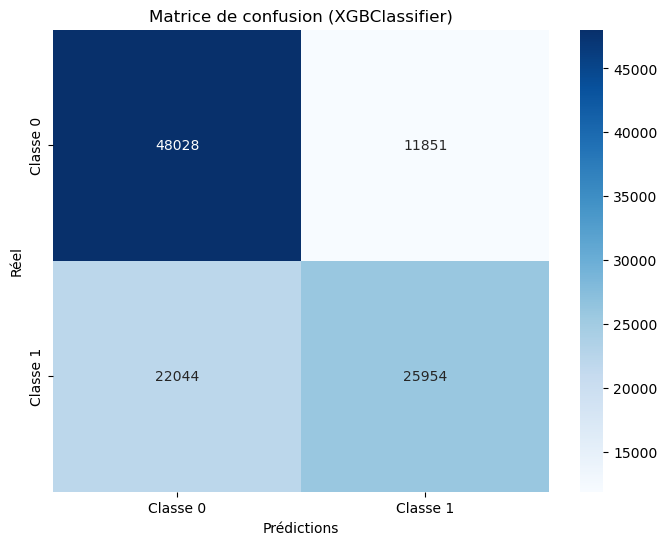

In [64]:
# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred_xgb)

# Affichage de la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matrice de confusion (XGBClassifier)')
plt.xlabel('Prédictions')
plt.ylabel('Réel')
plt.show()

##### 3- Entraînement du modèle Decision Tree

In [67]:
# Modèle DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)  # Entraînement du modèle

DecisionTreeClassifier(random_state=42)

In [69]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prédiction sur l'ensemble de test
y_pred_dtc = dtc.predict(X_test)

# Calcul de l'accuracy pour DecisionTreeClassifier
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print(f"Accuracy (DecisionTreeClassifier): {accuracy_dtc:.2f}")

# Rapport de classification pour DecisionTreeClassifier
print("\nClassification Report (DecisionTreeClassifier):")
print(classification_report(y_test, y_pred_dtc, zero_division=0))

Accuracy (DecisionTreeClassifier): 0.62

Classification Report (DecisionTreeClassifier):
              precision    recall  f1-score   support

           0       0.66      0.65      0.66     59879
           1       0.58      0.58      0.58     47998

    accuracy                           0.62    107877
   macro avg       0.62      0.62      0.62    107877
weighted avg       0.62      0.62      0.62    107877



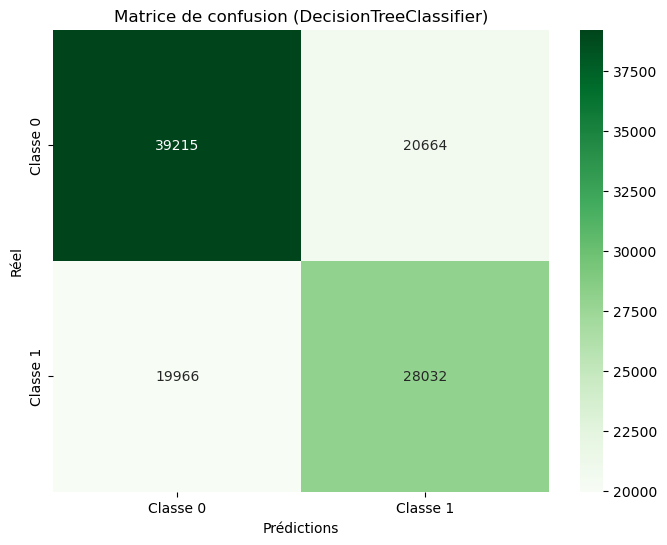

In [71]:
# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred_dtc)

# Affichage de la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matrice de confusion (DecisionTreeClassifier)')
plt.xlabel('Prédictions')
plt.ylabel('Réel')
plt.show()

In [73]:
# Sauvegarder les modèles et le scaler
joblib.dump(dtc, "decision_tree_model.pkl")
joblib.dump(mlp, "mlp_model.pkl")
joblib.dump(xgb_model, "xgb_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [75]:
# Affichage des résultats 
print("\nPrédictions des retards de vol :")
#Boucle pour parcourir les prédictions 
#for parcourt chaque prediction dans la liste y_pred_xgb
# enumerate permet de récupérer l'index i et la valeur de prédiction 
for i, prediction in enumerate(y_pred_xgb):
    #Pour récupérer les informations du vol  
    flight_id = X_test.index[i]  # Recupere l'Identifiant du vol a partir de l'index des donnees d'entrée X_test 
    airline = X_test.iloc[i]['Airline']  # Compagnie aérienne
    flight = X_test.iloc[i]['Flight']  # recupere le Numéro specifique de vol
    #Détermination du statut du vol 
    # si prediction est egale a 1 cela signifie que le vol est en retard sinon le vol est à l'heure
    status = "en retard" if prediction == 1 else "à l'heure" 
    #Afficage pour chaque vol l'id du vol, le nom de la compagnie, le num de vol et l'état du vol retard ou à l'heure 
    print(f"- Le vol {flight_id} ({airline} {flight}) sera {status}.")


Prédictions des retards de vol :
- Le vol 442150 (12 6477) sera en retard.
- Le vol 229730 (13 310) sera à l'heure.
- Le vol 69994 (15 1739) sera à l'heure.
- Le vol 414293 (3 1085) sera à l'heure.
- Le vol 171704 (2 129) sera à l'heure.
- Le vol 82605 (15 1846) sera en retard.
- Le vol 195559 (15 171) sera en retard.
- Le vol 433511 (15 1122) sera en retard.
- Le vol 220996 (4 426) sera en retard.
- Le vol 495964 (4 1581) sera en retard.
- Le vol 423376 (10 4124) sera à l'heure.
- Le vol 31846 (15 244) sera en retard.
- Le vol 467354 (13 155) sera en retard.
- Le vol 350333 (1 1216) sera à l'heure.
- Le vol 527948 (14 1924) sera à l'heure.
- Le vol 76841 (13 86) sera à l'heure.
- Le vol 418496 (1 1533) sera à l'heure.
- Le vol 216404 (16 3121) sera à l'heure.
- Le vol 332368 (0 3757) sera à l'heure.
- Le vol 2173 (5 1372) sera à l'heure.
- Le vol 434218 (1 1920) sera à l'heure.
- Le vol 489808 (14 1747) sera à l'heure.
- Le vol 239472 (11 6269) sera à l'heure.
- Le vol 178905 (8 950)